<a href="https://colab.research.google.com/github/Sahanaka/auto-encoders/blob/main/MNIST_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AutoEncoder for MNIST**

The Encoder will encode the images to lower resolution images and the deocoder will upsample them to the original shape.

## **Imports**

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
  
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

## **Prepare and load the dataset**

In [2]:
# Returns image as the image and the label
def map_image(image, label):
  image = tf.cast(image, dtype=tf.float32)
  image = image / 255.0
  image = tf.reshape(image, shape=(784,))

  return image, image

In [3]:
# Load from TFDS
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('mnist', as_supervised=True, split='test')
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat() # Don't shuffle the test set

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


## **Model**

In [4]:
# Encoder reduces the shape to 32 x 32
def simple_autoencoder(inputs):
  encoder = tf.keras.layers.Dense(units=32, activation='relu')(inputs)
  decoder = tf.keras.layers.Dense(units=784, activation='sigmoid')(encoder)

  return encoder, decoder

In [5]:
inputs = tf.keras.layers.Input(shape=(784, ))
encoder_output, decoder_output = simple_autoencoder(inputs)

In [6]:
# Setup the encoder for visualization
encoder_model = tf.keras.Model(inputs=inputs, outputs=encoder_output)


In [7]:
# Setup the auto encoder
auto_encoder_mnist = tf.keras.Model(inputs=inputs, outputs=decoder_output)

### Compile the Model

In [8]:
auto_encoder_mnist.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss='binary_crossentropy')

### Train the Model

In [10]:
train_steps = 60000 // BATCH_SIZE
history = auto_encoder_mnist.fit(train_dataset, steps_per_epoch=train_steps, epochs=50)

Epoch 1/50
468/468 [==============================] - 15s 26ms/step - loss: 0.2278
Epoch 2/50
468/468 [==============================] - 5s 12ms/step - loss: 0.1413
Epoch 3/50
468/468 [==============================] - 6s 12ms/step - loss: 0.1192
Epoch 4/50
468/468 [==============================] - 5s 12ms/step - loss: 0.1074
Epoch 5/50
468/468 [==============================] - 5s 12ms/step - loss: 0.1009
Epoch 6/50
468/468 [==============================] - 5s 12ms/step - loss: 0.0975
Epoch 7/50
468/468 [==============================] - 6s 12ms/step - loss: 0.0958
Epoch 8/50
468/468 [==============================] - 5s 11ms/step - loss: 0.0950
Epoch 9/50
468/468 [==============================] - 6s 12ms/step - loss: 0.0944
Epoch 10/50
468/468 [==============================] - 5s 12ms/step - loss: 0.0942
Epoch 11/50
468/468 [==============================] - 5s 12ms/step - loss: 0.0939
Epoch 12/50
468/468 [==============================] - 5s 11ms/step - loss: 0.0938
Epoch 13/50


## **Display Results**

The following results will help to visualize the results

In [17]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  '''Display sample outputs in one row.'''
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
  '''Displays the input, encoded, and decoded output values.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28,28,))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28,28,))

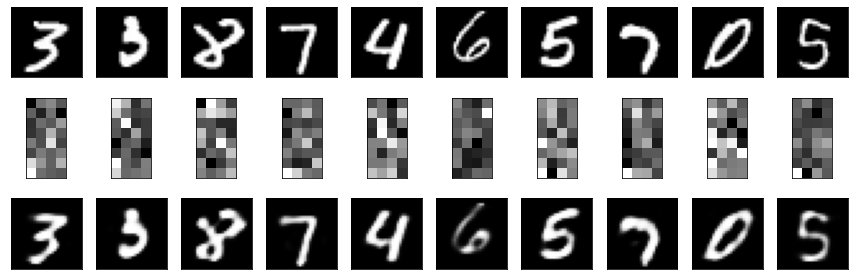

In [18]:
# take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# take the input images and put them in a list
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

# pick 10 random numbers to be used as indices to the list above
idxs = np.random.choice(BATCH_SIZE, size=10)

# get the encoder output
encoded_predicted = encoder_model.predict(test_dataset)

# get a prediction for the test batch
simple_predicted = auto_encoder_mnist.predict(test_dataset)

# display the 10 samples, encodings and decoded values!
display_results(output_samples[idxs], encoded_predicted[idxs], simple_predicted[idxs])